# 2: Observing the same object with multiple telescopes

A brief introduction into using ScopeSim to observe a cluster in the LMC using the 39m ELT and the 1.5m LFOA

In [1]:
from tempfile import TemporaryDirectory

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

import scopesim as sim
import scopesim_templates as sim_tp

# [Required for Readthedocs] Comment out these lines if running locally
tmpdir = TemporaryDirectory()
sim.rc.__config__["!SIM.file.local_packages_path"] = tmpdir.name

Download the packages for MICADO at the ELT and the viennese [1.5m telescope at the LFOA](https://foa.univie.ac.at/instrumentation/)

In [2]:
sim.download_packages(["LFOA"])
sim.download_packages(["Armazones", "ELT", "MICADO", "MAORY"])

['C:\\Users\\Kieran\\AppData\\Local\\Temp\\tmp3bqenznv\\Armazones.zip',
 'C:\\Users\\Kieran\\AppData\\Local\\Temp\\tmp3bqenznv\\ELT.zip',
 'C:\\Users\\Kieran\\AppData\\Local\\Temp\\tmp3bqenznv\\MICADO.zip',
 'C:\\Users\\Kieran\\AppData\\Local\\Temp\\tmp3bqenznv\\MAORY.zip']

## Create a star cluster ``Source`` object

In [3]:
cluster = sim_tp.stellar.clusters.cluster(mass=10000,        # Msun
                                          distance=50000,    # parsec
                                          core_radius=2,     # parsec
                                          seed=9001)         # random seed

INFO - sample_imf: Setting maximum allowed mass to 10000
INFO - sample_imf: Loop 0 added 1.01e+04 Msun to previous total of 0.00e+00 Msun


## Observe with the [1.5m telescope at the LFOA](https://foa.univie.ac.at/instrumentation/)

<img src=https://foa.univie.ac.at/fileadmin/_processed_/csm_FOA-2_1e249577a3.jpg width=400, align=left>


In [4]:
lfoa = sim.OpticalTrain("LFOA")
lfoa.observe(cluster,
             properties={"!OBS.ndit": 10, "!OBS.ndit": 360},
             update=True)
hdus_lfoa = lfoa.readout()


Reason:  <class 'ValueError'> !OBS.instrument was not found in rc.__currsys__



## Observe the same ``Source`` with MICADO at the ELT

<img src=https://astro.univie.ac.at/fileadmin/user_upload/i_astro/Aktuelles-News/2021/The_E-ELT.jpeg width=400 align=left>

In [5]:
micado = sim.OpticalTrain("MICADO")
micado.cmds["!OBS.dit"] = 10
micado.cmds["!OBS.ndit"] = 360
micado.update()

micado.observe(cluster)
hdus_micado = micado.readout()


Reason:  <class 'ValueError'> !OBS.instrument was not found in rc.__currsys__



Plot up the results

Text(0.5, 1.0, '39m ELT')

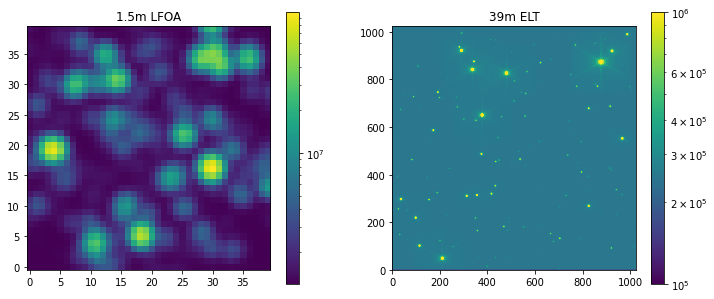

In [6]:
plt.figure(figsize=(12,5))

plt.subplot(121)
plt.imshow(hdus_lfoa[0][1].data[345:385, 525:565], norm=LogNorm(), origin="lower")
plt.colorbar()
plt.title("1.5m LFOA")

plt.subplot(122)
plt.imshow(hdus_micado[0][1].data, norm=LogNorm(), origin="lower", vmax=1E6, vmin=1e5)
plt.colorbar()
plt.title("39m ELT")